# FizzBuzz

In [1]:
def fizzBuzz(r):
    for i in range(1,r):
        if i%3==0 and i%5==0:
            print(str(i),"FizzBuzz")
        elif i%3==0:
            print(str(i),"Fizz")
        elif i%5==0:
            print(str(i),"Buzz")
        else:
            print(i)

In [2]:
fizzBuzz(16)

1
2
3 Fizz
4
5 Buzz
6 Fizz
7
8
9 Fizz
10 Buzz
11
12 Fizz
13
14
15 FizzBuzz


# Crowd Computing
- Harnessing the power of many people for estimation, calculation, or do anything with Perfection

## Wisdom of Crowd > Wisdom of Expert
- Conduct an experiment on estimation (number of candies in a jar or weight of bull), the aggregate measurements on the collected data will be close to actual value.
- Some people will over-estimate the number, while some will under-estimate it. The two will eventually cancel out, and give us a value very close to  actual value.
- We can use mean, median or other aggregate measures.
- We may want to take **trimmed mean** ( ```scipy.stats.trim_mean()``` ), depending on our data
- Eg. 10% trimmed mean involves removing 10% of smallest values and 10% of largest values, and then finding mean on remaining data samples. Data needs to be sorted for this.
- So **collective opinion of group of individuals > expert opinion**.  
- Eg. Wikipedia VS Britannica
    * Wikipedia(crowd-sourced) is **as good as** Britiannica(experts-curated)

In [35]:
import random
import statistics
from scipy import stats
import matplotlib.pyplot as plt

In [24]:
estimates = [random.randint(100, 1000) for i in range(100)] #assume this to be random responses of people


In [36]:
estimates.sort()
trim_val = int(0.1 * len(estimates))
trimmed_estimates = estimates[trim_val:len(estimates)-trim_val]
print(statistics.mean(trimmed_estimates))

527.0625


In [26]:
#Using Scipy
mv = stats.trim_mean(estimates, 0.1)
print(mv)


527.0625


/home/ubuntu/miniconda/envs/av/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


Now let's plot the estimates and the aggregate measures to find out which of the two - mean or median is closer to the actual value.

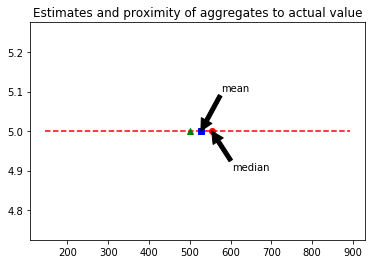

In [54]:
y = []
for i in range(len(trimmed_estimates)):
    y.append(5)
plt.plot(trimmed_estimates,y, 'r--')  
plt.plot([500],[5],'g^')
plt.plot([statistics.mean(trimmed_estimates)],[5], 'bs')
plt.plot([statistics.median(trimmed_estimates)],[5], 'ro')
plt.annotate(s='mean',xy=[statistics.mean(trimmed_estimates),5], xytext=[statistics.mean(trimmed_estimates)+50,5+0.1], arrowprops={'facecolor':'black'})
plt.annotate(s='median',xy=[statistics.median(trimmed_estimates),5], xytext=[statistics.median(trimmed_estimates)+50,5-0.1], arrowprops={'facecolor':'black'})
plt.title('Estimates and proximity of aggregates to actual value')
plt.show()

# Jumbled Words Game

## Rules
- A computer picks a word, jumbles it and presents it to the player.
- The player has to guess the right word.
- 2 players are asked one words each alternatively, and their scores are updated accordingly

In [6]:
import random
def choose():
    words = ["mathematics", "computer", "programming", "rainbow", "board", "water", "player", "condition", "mother", "cricket"]
    pick =  random.choice(words)
    return pick

def jumble(word):
    jumble = ''.join(random.sample(word,len(word)))
    return jumble

def thank(p1n,p2n,p1p,p2p):
    print(p1n,'Your score is',p1p)
    print(p2n,'Your score is',p2p)
    print("Have a nice day!")

In [7]:
def play():
    p1name = input("Player 1, Please enter your name: ")
    p2name = input("Player 2, Please enter your name: ")
    p1points = p2points = 0
    turn = 0
    while(1):
        picked_word = choose() #computers task
        question = jumble(picked_word)
        print('Question: ', question)
        if turn%2==0:
            print(p1name,"It's your turn")
            ans = input("What's on my mind ? ")
            if ans==picked_word:
                p1points += 1
                print("That's correct ! Your score is",p1points)
            else:
                print("Hard Luck ! I was thinking of",picked_word)
            c = int(input("Press 1 to continue, 0 to quit"))  
        else:
            print(p2name,"It's your turn")
            ans = input("What's on my mind ? ")
            if ans==picked_word:
                p2points += 1
                print("That's correct ! Your score is",p2points)
            else:
                print("Hard Luck ! I was thinking of",picked_word)
            c = int(input("Press 1 to continue, 0 to quit"))
        if c==0:
            thank(p1name,p2name,p1points,p2points)
            break
        turn += 1
            
            
        

In [8]:
play()

Player 1, Please enter your name: abc
Player 2, Please enter your name: def
Question:  mpgrgrnimoa
abc It's your turn
What's on my mind ? programming
That's correct ! Your score is 1
Press 1 to continue, 0 to quit1
Question:  esttcimamah
def It's your turn
What's on my mind ? mathematics
That's correct ! Your score is 1
Press 1 to continue, 0 to quit1
Question:  metcshaitam
abc It's your turn
What's on my mind ? mathematics
That's correct ! Your score is 2
Press 1 to continue, 0 to quit1
Question:  dbaro
def It's your turn
What's on my mind ? board
That's correct ! Your score is 2
Press 1 to continue, 0 to quit1
Question:  cckriet
abc It's your turn
What's on my mind ? criket
Hard Luck ! I was thinking of cricket
Press 1 to continue, 0 to quit0
abc Your score is 2
def Your score is 2
Have a nice day!
